<a href="https://colab.research.google.com/github/Nirajkanth/Deep-learning_Coursera/blob/main/Assign_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K) # raw vector
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
xt (50000, 3072)
yt (50000, 10)


In [ ]:
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1) + b1 
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*np.sum(w1*w1)
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))/(K-1)))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw1 = x.T.dot(dy_pred)  # D x K
    db1 = dy_pred.sum(axis=0) # 1 x K coloumn wise summation 

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    lr = lr*lr_decay 

Loss after 0 iteration 1.0000118676452614
Training accuracy :  0.6116222222222222
Loss after 10 iteration 0.8766356958524684
Training accuracy :  0.7293755555555556
Loss after 20 iteration 0.8425401892842723
Training accuracy :  0.7362422222222222
Loss after 30 iteration 0.8236164406371809
Training accuracy :  0.7406022222222223
Loss after 40 iteration 0.8123892646105431
Training accuracy :  0.7429866666666667
Loss after 50 iteration 0.8054267165248952
Training accuracy :  0.7448066666666666
Loss after 60 iteration 0.8009065582385979
Training accuracy :  0.7461822222222223
Loss after 70 iteration 0.7978224883833718
Training accuracy :  0.74752
Loss after 80 iteration 0.7956064494366558
Training accuracy :  0.7486466666666667
Loss after 90 iteration 0.7939317179422848
Training accuracy :  0.7492911111111111
Loss after 100 iteration 0.7926067706975002
Training accuracy :  0.7500088888888888
Loss after 110 iteration 0.7915169678711903
Training accuracy :  0.7502888888888889
Loss after 120

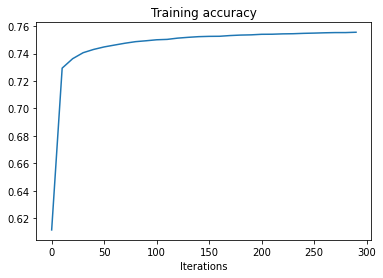

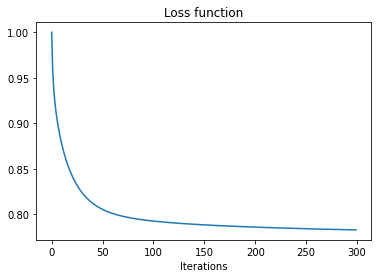

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

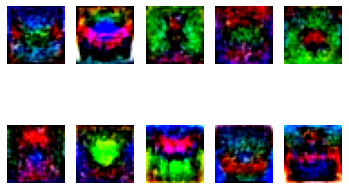

Training accuracy :  0.7554000000000001
Test accuracy :  0.7489222222222223


In [ ]:
plt.plot(np.arange(0,300,10),train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()

fg, ax = plt.subplots(2,5)

for i in range(2):
    for j in range(5):
        img = w1[:,5*i+j].reshape(32,32,3)
        ax[i,j].imshow(img*250)
        ax[i,j].axis("off")
plt.show()

y_pred = x_train.dot(w1) + b1 
train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1))/(K-1)))
print("Training accuracy : ",train_acc)
y_pred_test = x_test.dot(w1) + b1 
test_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1))/(K-1)))
print("Test accuracy : ",test_acc)

# Q2.

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [20]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    #indices = np.random.choice(Ntr, batch_size)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    h = 1./(1.0 + np.exp(-x.dot(w1) - b1))
    y_pred = h.dot(w2) + b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))/(K-1)))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
    db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
    dh = dy_pred.dot(w2.T) # Ntr x H
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis = 0)

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    
    lr = lr*lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Loss after 0 iteration 0.999967526733022
Training accuracy :  0.7220155555555555
Loss after 10 iteration 0.8684135632278902
Training accuracy :  0.686628888888889
Loss after 20 iteration 0.8494084802575723
Training accuracy :  0.6960555555555555
Loss after 30 iteration 0.8371781529114503
Training accuracy :  0.6937688888888889
Loss after 40 iteration 0.8184500652744393
Training accuracy :  0.7221022222222222
Loss after 50 iteration 0.8118679899937622
Training accuracy :  0.7256288888888889
Loss after 60 iteration 0.807838481627773
Training accuracy :  0.7300511111111111
Loss after 70 iteration 0.8031932837258196
Training accuracy :  0.7362288888888888
Loss after 80 iteration 0.7936915992175021
Training accuracy :  0.7346755555555555
Loss after 90 iteration 0.7931933429843134
Training accuracy :  0.7410066666666667
Loss after 100 iteration 0.7800467213310813
Training accuracy :  0.7542222222222221
Loss after 110 iteration 0.778623713721

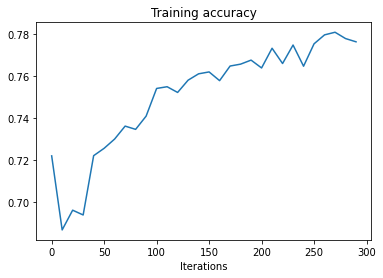

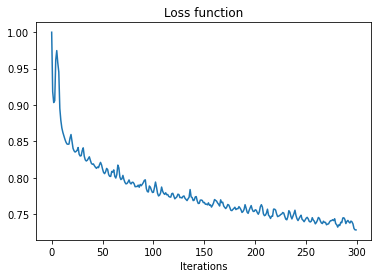

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

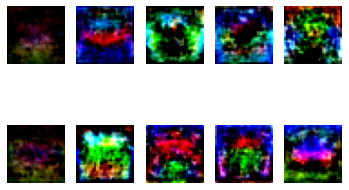

Training accuracy :  0.7838377777777777
Test accuracy :  0.769


In [22]:
plt.plot(np.arange(0,300,10),train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()

fg, ax = plt.subplots(2,5)

for i in range(2):
    for j in range(5):
        img = w1[:,5*i+j].reshape(32,32,3)
        ax[i,j].imshow(img*1000)
        ax[i,j].axis("off")
plt.show()

h = 1./(1 + np.exp(-x_train.dot(w1) - b1))
y_pred = h.dot(w2) + b2
train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1))/(K-1)))
print("Training accuracy : ",train_acc)
h_1 = 1./(1 + np.exp(-x_test.dot(w1) - b1))
y_pred_test = h_1.dot(w2) + b2
test_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1))/(K-1)))
print("Test accuracy : ",test_acc)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [ ]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

iterations = 300
lr = 0.001
lr_decay= 0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    seed += 1
    loss_1 = 0
    for st in range(0,Ntr+1, batch_size):
        # Forward pass
        end = st + batch_size
        x = x_train[st:end:,]
        y = y_train[st:end:,]
        h = 1./(1 + np.exp(-x.dot(w1) - b1))
        y_pred = h.dot(w2) + b2
        loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
        loss_1 += loss
        
        # Backward pass
        dy_pred = (2.0/batch_size)*(y_pred - y)
        dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
        db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
        dh = dy_pred.dot(w2.T) # Ntr x H
        dw1 = x.T.dot(dh*h*(h-1)) + reg*w1
        db1 = (dh*h*(1-h)).sum(axis = 0)

        w1 = w1 - lr*dw1
        b1 = b1 - lr*db1
        w2 = w2 - lr*dw2
        b2 = b2 - lr*db2
        lr = lr*lr_decay
    loss_avg = loss_1/Ntr
    loss_history.append(loss_avg)
    if t % 10 == 0:
            print("Loss after {} iteration {}".format(t, loss_avg))
            #train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))/10))
            #train_acc_history.append(train_acc)
            #print("Training accuracy : ",train_acc)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Loss after 0 iteration 0.0018105915907832165
Loss after 10 iteration 0.0018000998323657584
Loss after 20 iteration 0.0018000417203471273
Loss after 30 iteration 0.0018000161474524545
Loss after 40 iteration 0.0018000061167059928
Loss after 50 iteration 0.001800002369653954
Loss after 60 iteration 0.0018000009930856705
Loss after 70 iteration 0.0018000004903182818
Loss after 80 iteration 0.0018000003070754197
Loss after 90 iteration 0.0018000002403397528
Loss after 100 iteration 0.0018000002160418118
Loss after 110 iteration 0.0018000002071960066
Loss after 120 iteration 0.001800000203975755
Loss after 130 iteration 0.001800000202803463
Loss after 140 iteration 0.0018000002023767074
Loss after 150 iteration 0.0018000002022213522
Loss after 160 iteration 0.0018000002021647979
Loss after 170 iteration 0.0018000002021442097
Loss after 180 iteration 0.001800000202136715
Loss after 190 iteration 0.0018000002021339872
Loss after 200 iteration

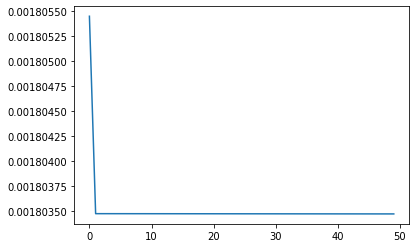

Training accuracy :  0.63
Test accuracy :  0.6300000000000001


In [ ]:
plt.plot(loss_history)
#plt.plot(train_acc)
plt.show()

h = 1./(1 + np.exp(-x_train.dot(w1) - b1))
y_pred = h.dot(w2) + b2

train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1))/10))
print("Training accuracy : ",train_acc)
h = 1./(1 + np.exp(-x_test.dot(w1) - b1))
y_pred_test = h.dot(w2) + b2

test_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1))/10))
print("Test accuracy : ",test_acc)

In [ ]:

%matplotlib inline 
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import numpy as np 
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
#x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
x_train, x_test = x_train/255., x_test/255.

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

model.compile(
    optimizer = tf.keras.optimizers.SGD(momentum = 0.9),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics= ["accuracy"]
)
print(model.summary())


model.fit(x_train, y_train, epochs = 5, batch_size = 50)

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size = 50,verbose = 2)
print("\nTest accuracy = ", test_acc)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 2, 2, 64)          0         
______________________________